In [1]:
# Undersample and plot imbalanced dataset with the Edited Nearest Neighbor rule
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, OneSidedSelection,EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek

from matplotlib import pyplot
from numpy import where
import numpy as np
from numpy import mean
import pandas as pd
import itertools
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from keras.optimizers import RMSprop,Adam
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

from visual_callbacks import AccLossPlotter,  ConfusionMatrixPlotter

In [2]:
# load dataset
dataframe = pd.read_csv("KidneyStoneDataset.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:5120]
Y = dataset[:,5120]
#verileri normalize etmesem de sonuç değişmiyor
normalized_X = preprocessing.normalize(X) 
print(normalized_X)
print(Y)
print(X.shape)

[[7.12608925e-04 1.06891339e-03 1.18768154e-03 ... 1.44897148e-02
  1.60337008e-02 1.27081925e-02]
 [7.80435184e-04 7.80435184e-04 7.80435184e-04 ... 1.33788889e-03
  5.57453703e-04 2.22981481e-04]
 [4.57271592e-04 3.47526410e-03 9.69415775e-03 ... 9.14543184e-05
  9.14543184e-05 0.00000000e+00]
 ...
 [1.10275826e-02 1.13519233e-02 1.60548629e-02 ... 6.32464298e-03
  6.64898364e-03 8.59502763e-03]
 [3.76171777e-03 4.77448794e-03 5.20853230e-03 ... 7.66811700e-03
  6.36598392e-03 5.35321375e-03]
 [1.16057158e-02 4.15362460e-03 2.07681230e-03 ... 1.77139873e-02
  1.78361527e-02 1.79583181e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [9]:
X = np.array(normalized_X) 
y = np.array(Y)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
over = SMOTE(sampling_strategy=0.3)
#under = RandomUnderSampler(sampling_strategy=0.6)
#over=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
#over = RandomOverSampler(sampling_strategy=0.3)
#undersample = EditedNearestNeighbours(n_neighbors=2)
#undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=300)
#undersample = TomekLinks()
X, y=over.fit_resample(X,y)
#X, y = over.fit_resample(X, y)


counter = Counter(y)
print(counter)

Counter({1: 182, 0: 39})
Counter({1: 182, 0: 54})


In [10]:
model=Sequential()
model.add(Dense(32,input_dim=5120))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Dropout(0.2))

model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('softmax'))

class_names = ['Healthy', 'Patient']
#plotter = ConfusionMatrixPlotter(X_val=X_test, classes=class_names, Y_val=y_test)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [11]:
def plot_confusion_matrix(cm, names,normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=None)
print('Train size:  %d' % len(trainX))
print('Test size:  %d'% len(testX))

Train size:  188
Test size:  48


train (%) 0.7933333333333333 	 test(%): 0.7894736842105263
train (%) 0.8133333333333334 	 test(%): 0.7105263157894737
train (%) 0.7933333333333333 	 test(%): 0.7894736842105263
train (%) 0.7814569536423841 	 test(%): 0.8378378378378378
train (%) 0.7814569536423841 	 test(%): 0.8378378378378378
Precision: 0.793
Recall: 1.000
F1 Score: 0.884
Confusion matrix
[[  0  39]
 [  0 149]]


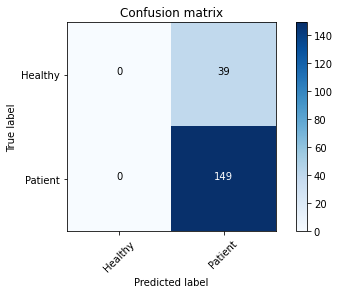

In [13]:
n_splits=5
#split sayısı doğruluğu değiştirmiyor.
skf = StratifiedKFold(n_splits=n_splits,random_state=42,shuffle=True)
cm=0
precision=0
recall=0
f1=0

for train_index, test_index in skf.split(trainX, trainy):
    # print(f"train {np.sum(train_index)} \t test: {np.sum(test_index)}") #check split index
    print(f"train (%) {np.sum(y[train_index])/len(train_index)} \t test(%): {np.sum(y[test_index])/len(test_index)}")
    cnn=model.fit(X[train_index,:], y[train_index], \
                  validation_data=(X[test_index,:], \
                  y[test_index]), epochs=100,batch_size=32, verbose=0)
    pred=model.predict(X[test_index,:])
    precision = precision+ precision_score(y[test_index], pred)
    recall = recall+ recall_score(y[test_index], pred)
    f1=f1+f1_score(y[test_index],pred)
    cm =cm + confusion_matrix(y[test_index], pred)
    pred = np.argmax(pred,axis=1)
# Compute confusion matrix
precision=precision/n_splits
print('Precision: %.3f' % precision)
recall=recall/n_splits
print('Recall: %.3f' % recall)
f1=f1/n_splits
print('F1 Score: %.3f' % f1)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, class_names)

Precision: 0.792
Recall: 1.000
F1 Score: 0.884
Confusion matrix
[[ 0 10]
 [ 0 38]]


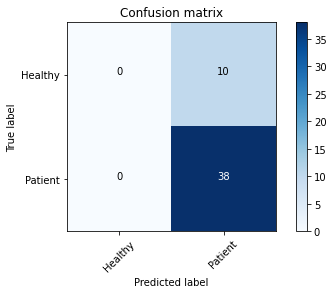

In [15]:
y_pred = model.predict(testX)
precision = precision_score(testy, y_pred)
print('Precision: %.3f' % precision)
recall = recall_score(testy, y_pred)
print('Recall: %.3f' % recall)
f1=f1_score(testy,y_pred)
print('F1 Score: %.3f' % f1)


cm = confusion_matrix(testy, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
class_names = ['Healthy', 'Patient']
plot_confusion_matrix(cm, class_names)